In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/GTD/

Mounted at /content/drive
/content/drive/My Drive/GTD


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [23]:
dataFrame = pd.read_excel("globalterrorismdb_0221dist.xlsx")

In [24]:
dataFrame.head(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [25]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201183 entries, 0 to 201182
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(53), int64(24), object(57)
memory usage: 207.2+ MB


In [26]:
print("Toplam satır ve sütun sayısı:")
dataFrame.shape

Toplam satır ve sütun sayısı:


(201183, 135)

In [27]:
check_nulls = dataFrame.isnull().sum().sort_values(ascending=False)
check_nulls.head()

gsubname3           201160
weapsubtype4        201113
weapsubtype4_txt    201113
weaptype4           201110
weaptype4_txt       201110
dtype: int64

In [28]:
row_count = dataFrame.shape[0]
check_nulls_percentage = 100 * check_nulls / row_count
check_nulls_percentage.head()

gsubname3           99.988568
weapsubtype4        99.965206
weapsubtype4_txt    99.965206
weaptype4           99.963715
weaptype4_txt       99.963715
dtype: float64

In [29]:
bins = (-1, 0, 25, 50, 75, 100)
labels = ['0 %','1-25 %','25-50 %','50-75 %','75-100 %']

check_nulls_percentage_grouped = pd.cut(check_nulls_percentage, bins, labels=labels)
check_nulls_percentage_grouped.head()

gsubname3           75-100 %
weapsubtype4        75-100 %
weapsubtype4_txt    75-100 %
weaptype4           75-100 %
weaptype4_txt       75-100 %
dtype: category
Categories (5, object): ['0 %' < '1-25 %' < '25-50 %' < '50-75 %' < '75-100 %']

In [30]:
check_nulls_percentage_grouped_counts = check_nulls_percentage_grouped.value_counts()
check_nulls_percentage_grouped_counts.sort_index()

0 %         32
1-25 %      16
25-50 %     10
50-75 %      7
75-100 %    70
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Sütun Sayısı')

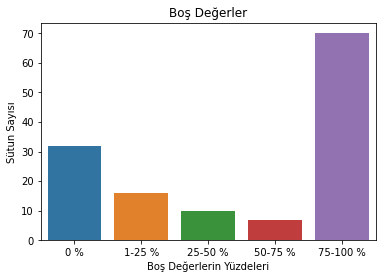

In [31]:
sbn.barplot(check_nulls_percentage_grouped_counts.index, check_nulls_percentage_grouped_counts.values)
plt.title('Boş Değerler')
plt.xlabel('Boş Değerlerin Yüzdeleri')
plt.ylabel('Sütun Sayısı')

In [42]:
data  = dataFrame

In [43]:
#Removing columns which has null values
def remove_columns_missing_values(data, min_threshold):
    for col in data.columns:
        rate = data[col].isnull().sum()/float(len(data)) * 100
        if rate >= min_threshold:
            data = data.drop(col,1)
    return data

In [49]:
data = remove_columns_missing_values(data, 0.00000001)
print ("Total no of features values available :")
len(data.columns)

Total no of features values available :


32

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201183 entries, 0 to 201182
Data columns (total 32 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   eventid          201183 non-null  int64 
 1   iyear            201183 non-null  int64 
 2   imonth           201183 non-null  int64 
 3   iday             201183 non-null  int64 
 4   extended         201183 non-null  int64 
 5   country          201183 non-null  int64 
 6   country_txt      201183 non-null  object
 7   region           201183 non-null  int64 
 8   region_txt       201183 non-null  object
 9   provstate        201183 non-null  object
 10  vicinity         201183 non-null  int64 
 11  crit1            201183 non-null  int64 
 12  crit2            201183 non-null  int64 
 13  crit3            201183 non-null  int64 
 14  doubtterr        201183 non-null  int64 
 15  multiple         201183 non-null  int64 
 16  success          201183 non-null  int64 
 17  suicide   

In [51]:
columns_to_drop = data .columns[data .columns.map(lambda x: 'txt' in x)]
data = data .drop(columns_to_drop,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [58]:
columns_to_drop = ['dbsource' , 'provstate','eventid']
data = data.drop(columns_to_drop,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201183 entries, 0 to 201182
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   iyear        201183 non-null  int64 
 1   imonth       201183 non-null  int64 
 2   iday         201183 non-null  int64 
 3   extended     201183 non-null  int64 
 4   country      201183 non-null  int64 
 5   region       201183 non-null  int64 
 6   vicinity     201183 non-null  int64 
 7   crit1        201183 non-null  int64 
 8   crit2        201183 non-null  int64 
 9   crit3        201183 non-null  int64 
 10  doubtterr    201183 non-null  int64 
 11  multiple     201183 non-null  int64 
 12  success      201183 non-null  int64 
 13  suicide      201183 non-null  int64 
 14  attacktype1  201183 non-null  int64 
 15  targtype1    201183 non-null  int64 
 16  gname        201183 non-null  object
 17  individual   201183 non-null  int64 
 18  weaptype1    201183 non-null  int64 
 19  pr

In [60]:
data =data.loc[data.gname != 'Unknown']
data.shape

(111952, 24)

In [64]:
data.gname.value_counts().head(10)

Taliban                                             10094
Islamic State of Iraq and the Levant (ISIL)          6864
Shining Path (SL)                                    4563
Al-Shabaab                                           4126
Farabundo Marti National Liberation Front (FMLN)     3351
New People's Army (NPA)                              3249
Boko Haram                                           3018
Houthi extremists (Ansar Allah)                      2776
Irish Republican Army (IRA)                          2669
Kurdistan Workers' Party (PKK)                       2524
Name: gname, dtype: int64

In [65]:
fg = [] 
i = 0           # Filtered groups
while i < 10:
    a = data["gname"].value_counts().index[i]
    fg.append(a)
    i += 1

In [66]:
fg

['Taliban',
 'Islamic State of Iraq and the Levant (ISIL)',
 'Shining Path (SL)',
 'Al-Shabaab',
 'Farabundo Marti National Liberation Front (FMLN)',
 "New People's Army (NPA)",
 'Boko Haram',
 'Houthi extremists (Ansar Allah)',
 'Irish Republican Army (IRA)',
 "Kurdistan Workers' Party (PKK)"]

In [67]:
data=data[data['gname'].isin(fg)]

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43234 entries, 39 to 201177
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   iyear        43234 non-null  int64 
 1   imonth       43234 non-null  int64 
 2   iday         43234 non-null  int64 
 3   extended     43234 non-null  int64 
 4   country      43234 non-null  int64 
 5   region       43234 non-null  int64 
 6   vicinity     43234 non-null  int64 
 7   crit1        43234 non-null  int64 
 8   crit2        43234 non-null  int64 
 9   crit3        43234 non-null  int64 
 10  doubtterr    43234 non-null  int64 
 11  multiple     43234 non-null  int64 
 12  success      43234 non-null  int64 
 13  suicide      43234 non-null  int64 
 14  attacktype1  43234 non-null  int64 
 15  targtype1    43234 non-null  int64 
 16  gname        43234 non-null  object
 17  individual   43234 non-null  int64 
 18  weaptype1    43234 non-null  int64 
 19  property     43234 non-

In [69]:
data.to_csv("gtd_1.csv")